<a href="https://colab.research.google.com/github/omid-sakaki-ghazvini/Practices/blob/main/Students_Performance_in_Exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install Dependencies and Setup

<div style="direction:rtl">
<font color='green' size="5px">
 کتابخانه های مورد نیاز را نصب میکنیم
    </font>
</div>

In [ ]:
#Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score

#MOdeling
from sklearn.pipeline import Pipeline

#Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier

#Clustering
from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import make_blobs

import warnings

warnings.filterwarnings('ignore')

<div style="direction:rtl">
<font color='green' size="5px">
 از لینک زیر دیتاست را دانلود کرده و در پوشه هم مسیر همین ژوپیتر نوت بوک قرار دهید
    </font>
</div>

## https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data

# 2. Load Data

<div style="direction:rtl">
<font color='green' size="5px">
توسط خط فرمان زیر، دیتا را فراخوانی میکنیم
    </font>
</div>

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 3.Data Analysis

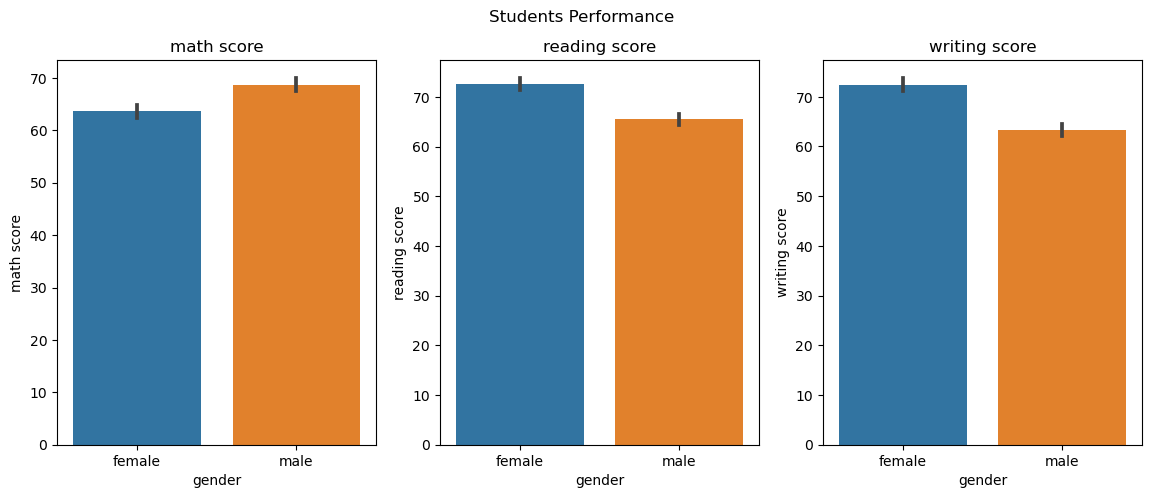

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(14,5))

plt.suptitle("Students Performance")

#math score
sns.barplot(x=df['gender'], y=df['math score'], ax=axes[0]);
axes[0].set_title('math score');

#reading score
sns.barplot(x=df['gender'], y=df['reading score'], ax=axes[1]);
axes[1].set_title('reading score');

#writing score
sns.barplot(x=df['gender'], y=df['writing score'], ax=axes[2]);
axes[2].set_title('writing score');

<div style="direction:rtl">
<font color='red' size="4px">
با توجه به نمودار فراوانی فوق، پسرها در مهارت ریاضیاتی و دخترها در مهارتهای خواندن و نوشتن، قویتر هستند
    </font>
</div>

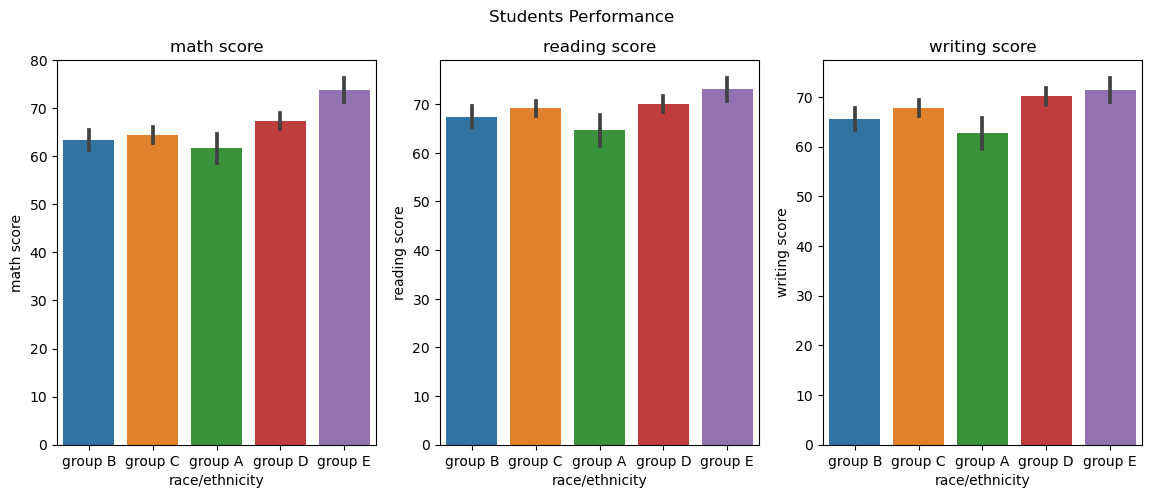

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(14,5))

plt.suptitle("Students Performance")

#math score
sns.barplot(x=df['race/ethnicity'], y=df['math score'], ax=axes[0]);
axes[0].set_title('math score');

#reading score
sns.barplot(x=df['race/ethnicity'], y=df['reading score'], ax=axes[1]);
axes[1].set_title('reading score');

#writing score
sns.barplot(x=df['race/ethnicity'], y=df['writing score'], ax=axes[2]);
axes[2].set_title('writing score');

<div style="direction:rtl">
<font color='red' size="4px">
با توجه به نمودار فراوانی فوق، گروه
    E
    بیشترین نمره را در هر سه حوزه ریاضیات و خواندن و نوشتن کسب کرده و گروه
    A
    کمترین نمره را در هر سه حوزه ریاضیات و خواندن و نوشتن کسب کرده
    </font>
</div>

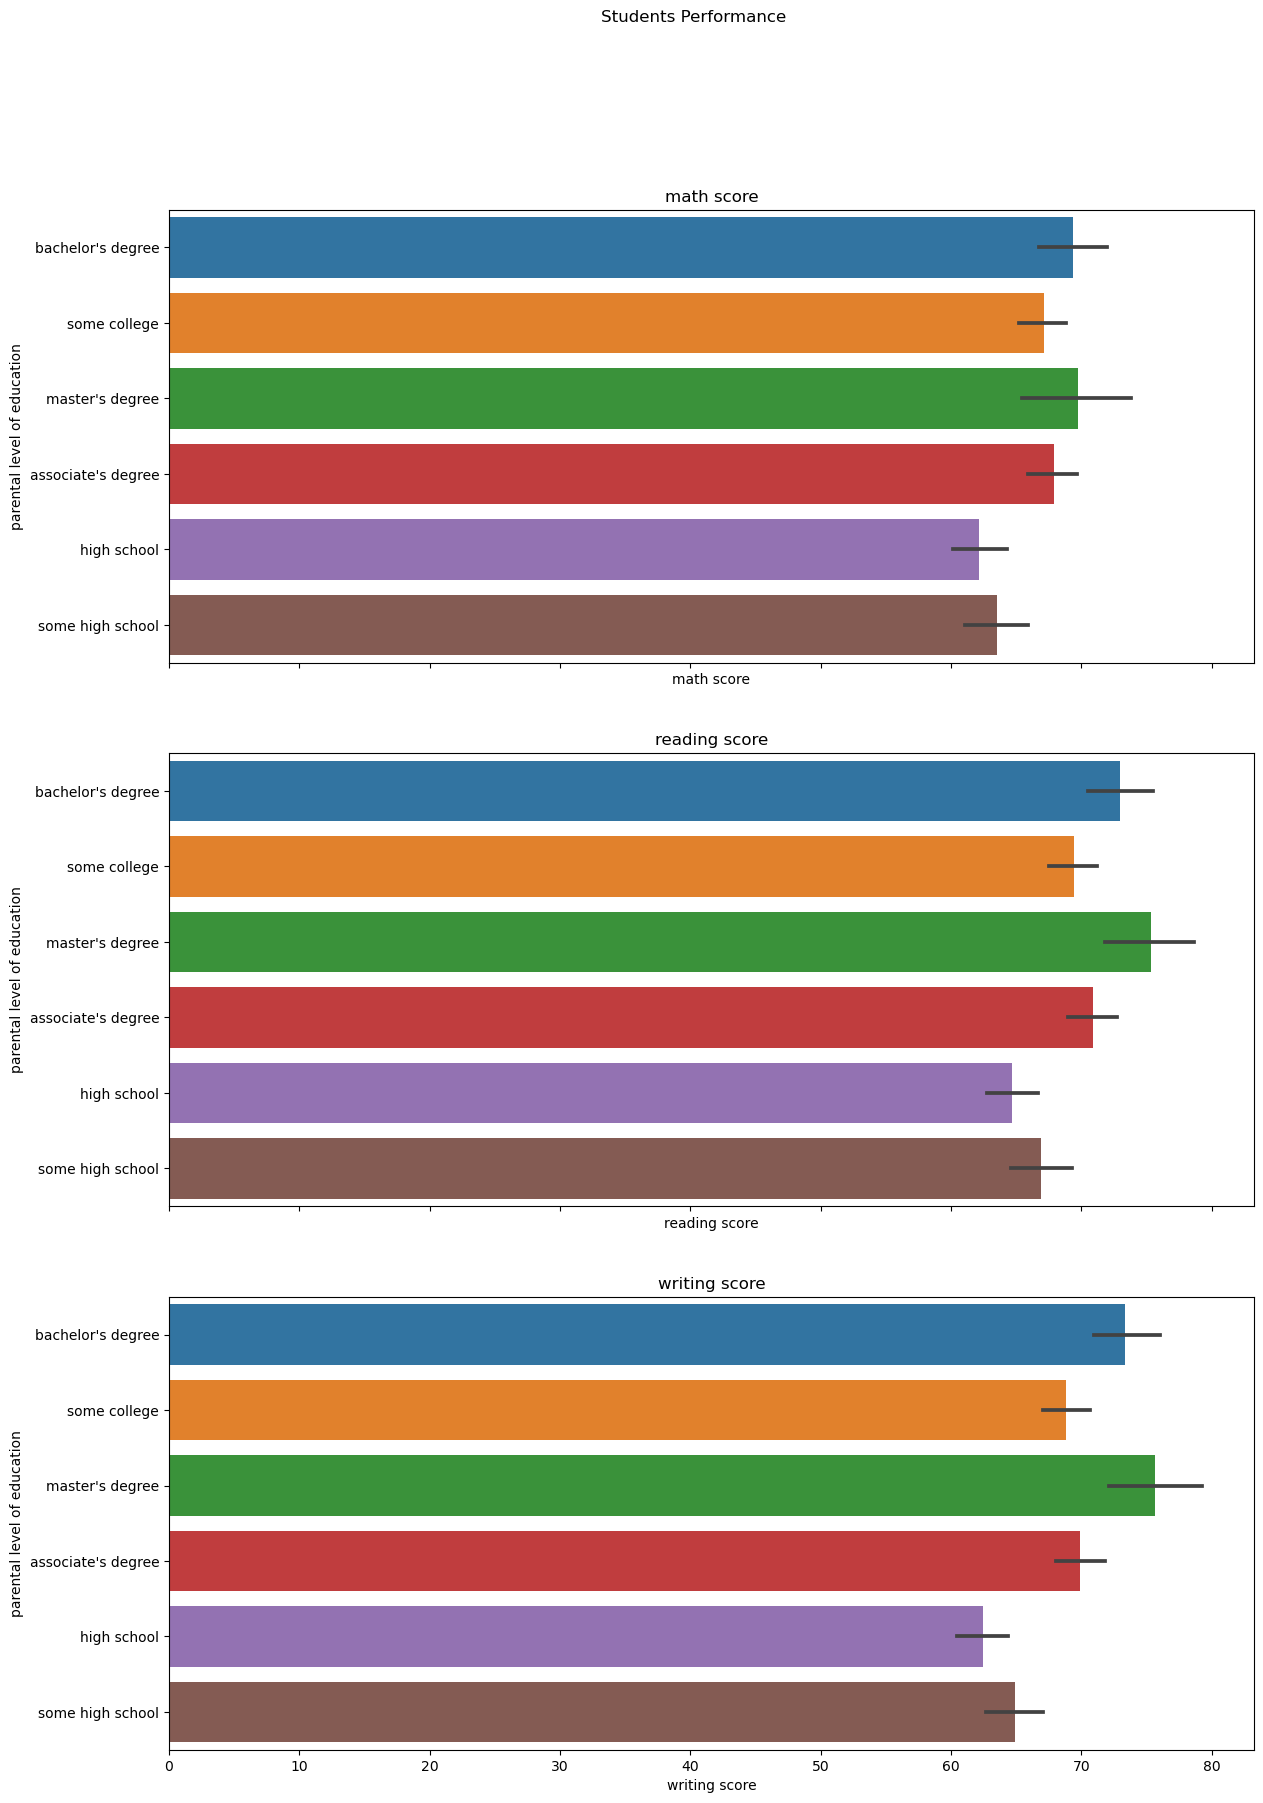

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(14,20))

plt.suptitle("Students Performance")

#math score
sns.barplot(x=df['math score'], y=df['parental level of education'], ax=axes[0]);
axes[0].set_title('math score');

#reading score
sns.barplot(x=df['reading score'], y=df['parental level of education'], ax=axes[1]);
axes[1].set_title('reading score');

#writing score
sns.barplot(x=df['writing score'], y=df['parental level of education'], ax=axes[2]);
axes[2].set_title('writing score');

<div style="direction:rtl">
<font color='red' size="4px">
با توجه به نمودار فراوانی فوق، گروه دانش آموزانی که والدین آنها دارای مدارک دانشگاهی هستند، نمرات بهتری در هر سه حوزه کسب کرده اند
    </font>
</div>

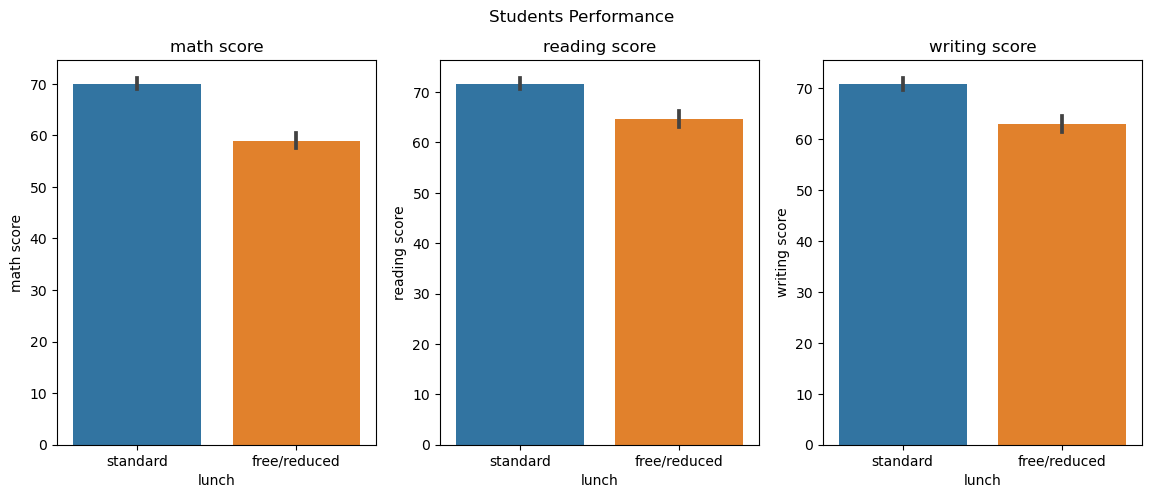

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(14,5))

plt.suptitle("Students Performance")

#math score
sns.barplot(x=df['lunch'], y=df['math score'], ax=axes[0]);
axes[0].set_title('math score');

#reading score
sns.barplot(x=df['lunch'], y=df['reading score'], ax=axes[1]);
axes[1].set_title('reading score');

#writing score
sns.barplot(x=df['lunch'], y=df['writing score'], ax=axes[2]);
axes[2].set_title('writing score');

<div style="direction:rtl">
<font color='red' size="4px">
با توجه به نمودار فراوانی فوق، گروه دانش آموزانی که والدین آنها دارای مدارک دانشگاهی هستند، نمرات بهتری در هر سه حوزه کسب کرده اند
    </font>
</div>

In [ ]:
def ave_list(df):
    ave = []
    for i in range(len(df)):
        ave.append(round( ( (df.loc[i][5]/100) + (df.loc[i][6]/100) + (df.loc[i][7]/100) )/3, 2 ))
    return(ave)

In [ ]:
ave = np.array(ave_list(df))

df['average'] = ave.tolist()

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,0.73
1,female,group C,some college,standard,completed,69,90,88,0.82
2,female,group B,master's degree,standard,none,90,95,93,0.93
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.49
4,male,group C,some college,standard,none,76,78,75,0.76


In [ ]:
def check_list(df):
    check = []
    for i in range(len(df)):
        if(df['average'][i] > 0.6):
            check.append(True)
        else:
            check.append(False)

    return(check)

In [ ]:
to_pass = np.array(check_list(df))

df['to_pass'] = to_pass.tolist()

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,to_pass
0,female,group B,bachelor's degree,standard,none,72,72,74,0.73,True
1,female,group C,some college,standard,completed,69,90,88,0.82,True
2,female,group B,master's degree,standard,none,90,95,93,0.93,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.49,False
4,male,group C,some college,standard,none,76,78,75,0.76,True


Text(0.5, 1.0, 'average & test preparation course')

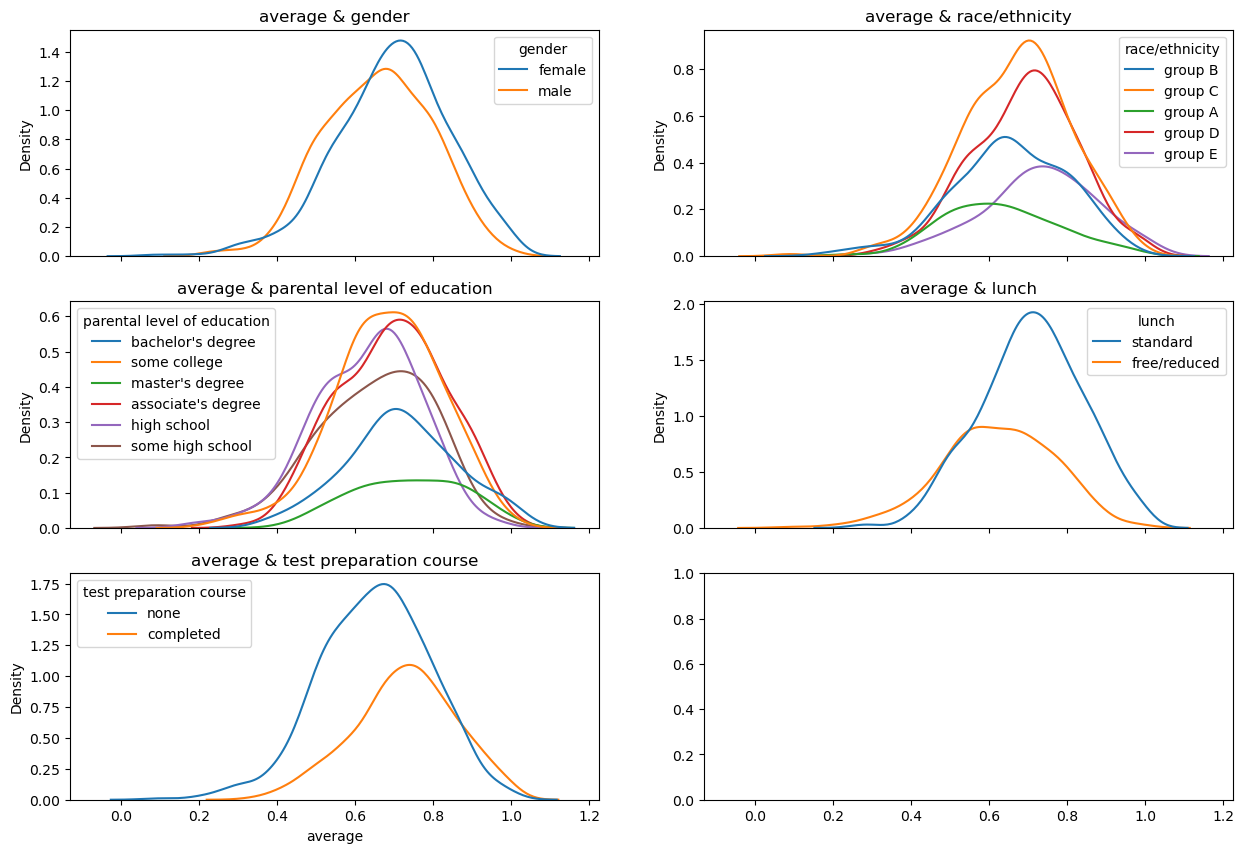

In [ ]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(15,10))

sns.kdeplot(data=df ,x='average', hue='gender', ax=axes[0,0]);
axes[0,0].set_title('average & gender')

sns.kdeplot(data=df ,x='average', hue='race/ethnicity', ax=axes[0,1]);
axes[0,1].set_title('average & race/ethnicity')

sns.kdeplot(data=df ,x='average', hue='parental level of education', ax=axes[1,0]);
axes[1,0].set_title('average & parental level of education')

sns.kdeplot(data=df ,x='average', hue='lunch', ax=axes[1,1]);
axes[1,1].set_title('average & lunch')

sns.kdeplot(data=df ,x='average', hue='test preparation course', ax=axes[2,0]);
axes[2,0].set_title('average & test preparation course')

<div style="direction:rtl">
<font color='red' size="4px">
طبق بررسی فوق، متوجه میشویم که
    معدل دخترها و گروه c و افرادی که تغذیه مناسب دارند بیشتر است
    </font>
</div>

## 4.Data preparation

In [ ]:
gender = {"male":0,"female":1}

group = {"group A":0.1,"group B":0.3,"group C":0.5,"group D":0.7,"group E":1}

degree = {"high school":0.1,"some high school":0.3,"some college":0.5,"associate's degree":0.7,"bachelor's degree":0.9,"master's degree":1}

lunch = {"free/reduced":0,"standard":1}

course = {"none":0,"completed":1}



df["gender"] = df["gender"].map(gender)
df["race/ethnicity"] = df["race/ethnicity"].map(group)
df["parental level of education"] = df["parental level of education"].map(degree)
df["lunch"] = df["lunch"].map(lunch)
df["test preparation course"] = df["test preparation course"].map(course)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,to_pass
0,1,0.3,0.9,1,0,72,72,74,0.73,True
1,1,0.5,0.5,1,1,69,90,88,0.82,True
2,1,0.3,1.0,1,0,90,95,93,0.93,True
3,0,0.1,0.7,0,0,47,57,44,0.49,False
4,0,0.5,0.5,1,0,76,78,75,0.76,True


In [ ]:
x = df.drop(columns=['math score', 'reading score', 'writing score', 'average', 'to_pass'])
y = df['to_pass']

print(x.shape)
print(y.shape)

(1000, 5)
(1000,)


# 5. Split Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(700, 5)
(700,)
(300, 5)
(300,)


# 6. Scale Data

<div style="direction:rtl">
<font color='green' size="5px">
 نرمالسازی دیتا
    </font>
</div>

In [ ]:
scaler_data = preprocessing.StandardScaler()

x_train = scaler_data.fit_transform(x_train)

x_test = scaler_data.fit_transform(x_test)

# 7. Build Tree Model

## 7-1. Train Model

In [ ]:
Tree_model = DecisionTreeClassifier(random_state=42)

Tree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

## 7-2. Test Model

In [ ]:
Tree_predict = Tree_model.predict(x_test)

print('accuracy : ',accuracy_score(y_test, Tree_predict))

print(classification_report(y_test, Tree_predict))

accuracy :  0.6366666666666667
              precision    recall  f1-score   support

       False       0.39      0.49      0.44        85
        True       0.78      0.69      0.73       215

    accuracy                           0.64       300
   macro avg       0.58      0.59      0.58       300
weighted avg       0.67      0.64      0.65       300



## 7-3. Plot Performance

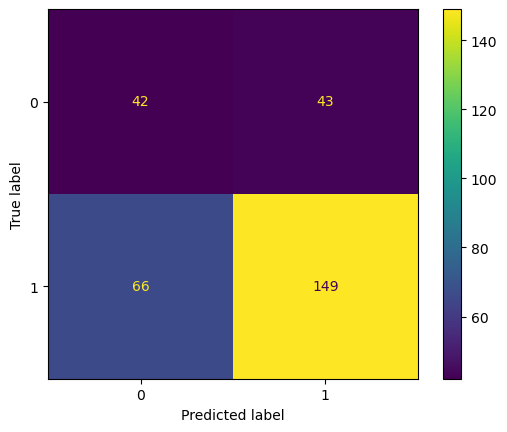

In [ ]:
confu = ConfusionMatrixDisplay(confusion_matrix(y_test, Tree_predict))

confu.plot()

plt.show()

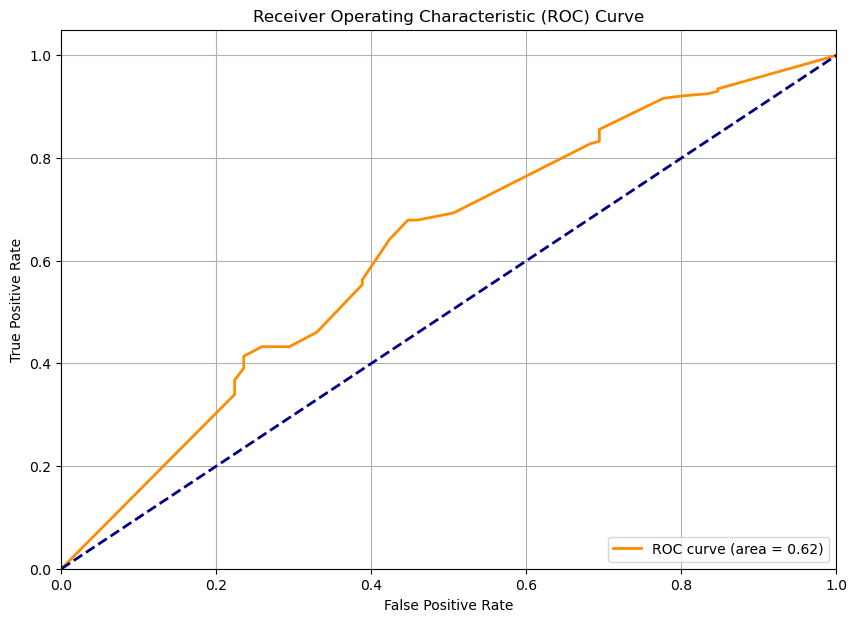

In [ ]:
y_prob = Tree_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 8. Build KNN Model

## 8-1. Train Model

In [ ]:
nca = NeighborhoodComponentsAnalysis()

knn = KNeighborsClassifier(n_neighbors=10)

nca_pipe = Pipeline([('nca', nca), ('knn', knn)])

nca_pipe.fit(x_train, y_train)

Pipeline(steps=[('nca', NeighborhoodComponentsAnalysis()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

## 8-2. Test Model

In [ ]:
KNN_predict = nca_pipe.predict(x_test)

print('accuracy : ',accuracy_score(y_test, KNN_predict))

print(classification_report(y_test, KNN_predict))

accuracy :  0.7
              precision    recall  f1-score   support

       False       0.47      0.46      0.46        85
        True       0.79      0.80      0.79       215

    accuracy                           0.70       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.70      0.70      0.70       300



## 8-3. Plot Performance

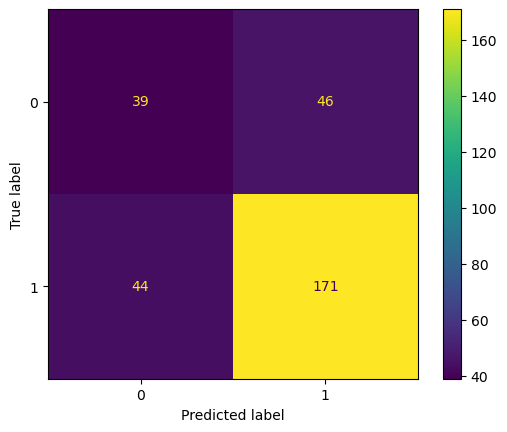

In [ ]:
confu = ConfusionMatrixDisplay(confusion_matrix(y_test, KNN_predict))

confu.plot()

plt.show()

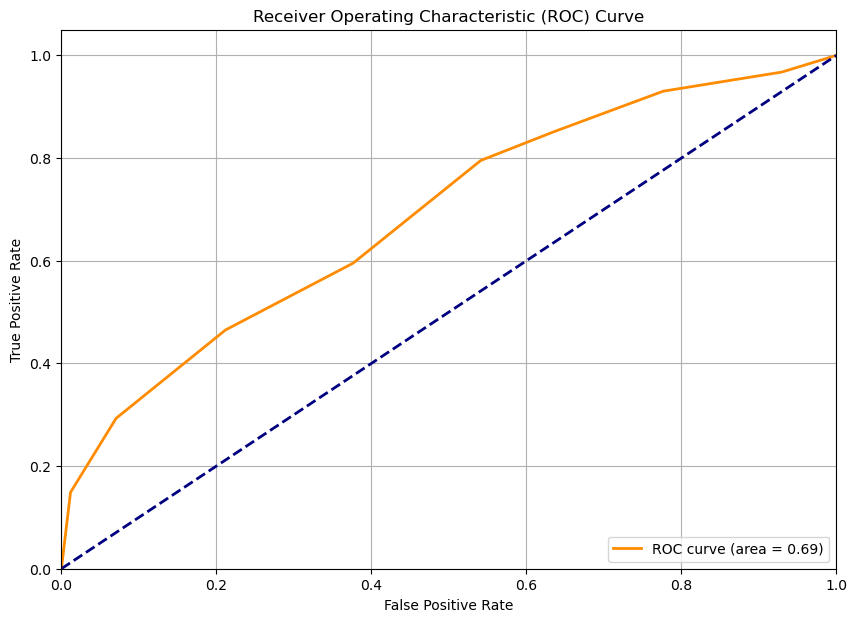

In [ ]:
y_prob = nca_pipe.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 9. Clustering

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,to_pass
0,1,0.3,0.9,1,0,72,72,74,0.73,True
1,1,0.5,0.5,1,1,69,90,88,0.82,True
2,1,0.3,1.0,1,0,90,95,93,0.93,True
3,0,0.1,0.7,0,0,47,57,44,0.49,False
4,0,0.5,0.5,1,0,76,78,75,0.76,True


In [ ]:
x = df.drop(columns=['average', 'to_pass'])

x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0.3,0.9,1,0,72,72,74
1,1,0.5,0.5,1,1,69,90,88
2,1,0.3,1.0,1,0,90,95,93
3,0,0.1,0.7,0,0,47,57,44
4,0,0.5,0.5,1,0,76,78,75


In [ ]:
x,y = make_blobs(n_samples=400, centers = 2, cluster_std = 0.6)

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=2)
kmeans.fit(x)
h = .02
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

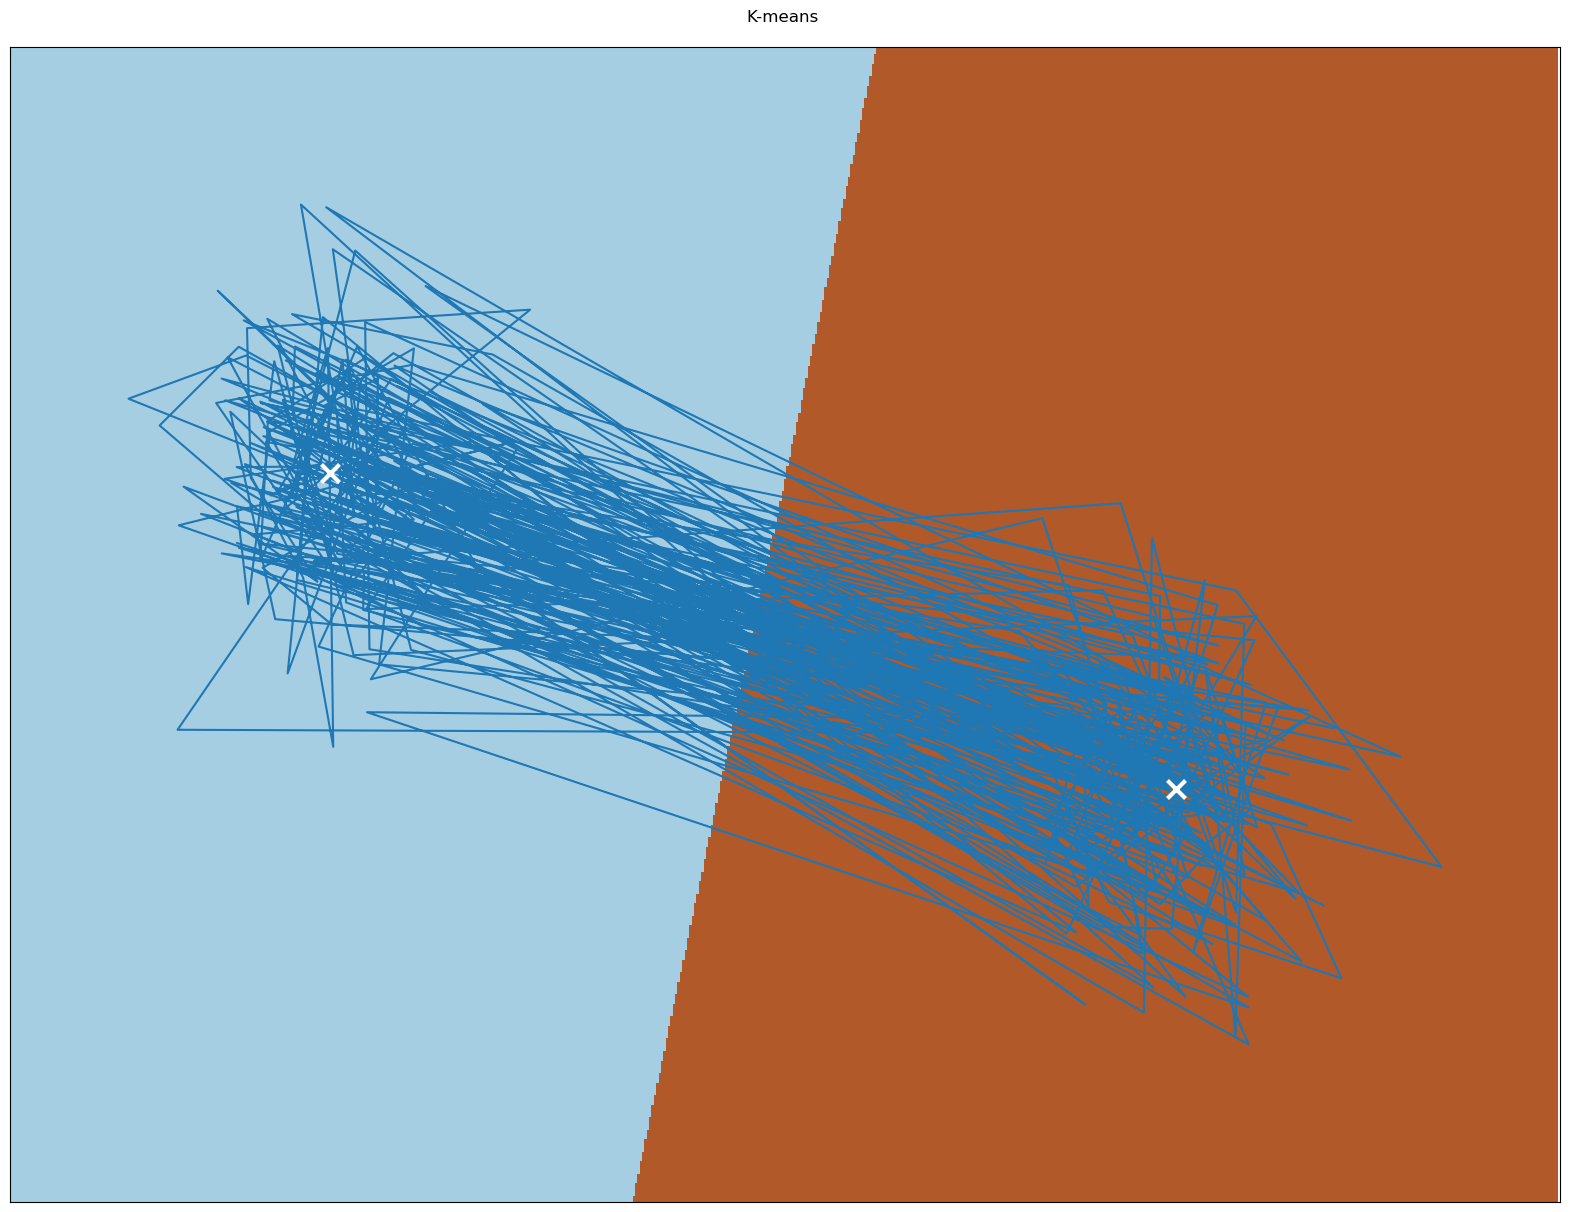

In [ ]:
plt.figure(figsize=(20, 15))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(x[:, 0], x[:, 1])

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means \n')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()